# A Firm's Labour Portfolio Decission (Julia)

## Preparation Commands

### Load Libraries:

In [45]:
using PyCall
using Color

import LabourDP, DisplayDP

@pyimport IPython.display as IpDisp

### Create Colours:

In [46]:
Colour1=RGB(202/255,215/255,237/255);
Colour2=RGB(37/255,131/255,192/255);
Colour3=RGB(0/255,74/255,124/255);
Colour=vcat(Colour1,Colour2,Colour3);

## Model

## Parameters

### Firm:

$\beta$ Firm's intertemporal discount rate

In [47]:
β=0.9;

#### Error Checking:

In [48]:
0<β<1 || error("\u03B2 \u2209 (0,1)");                   # Check if β is between 0 and 1
;

### Labour Market:

$G$ Number of different heterogenous tenure workes  
$N$ Max Number of Workers hired during one period

In [49]:
G=3;
N=3;

#### Error Checking:

In [50]:
isa(N,Int) || error("N is not and Interger");             # Check if N is an Interger
isa(G,Int) || error("G is not and Interger");             # Check if G is an Interger
N>0 || error("N \u226F 0");                               # Check if N is greater than zero  
G>0 || error("G \u226F 0");                               # Check if G is greater than zero  
;

### Wage Function:

$\alpha_w$ Entry level wage  
$\beta_w$ Period Wage Increase with tenure

In [51]:
α₁=0.8;
β₁=0.0;

#### Error Checking:

In [52]:
α₁>0 || error("Starting Wage is Negative");                                   # Check if Wages are negative
α₁+(β₁*(G-1))>0 || error("Slope of Wage Function creates Negative Wages");    # Check if Wages are negative
α₁=float(α₁);                                                                 # Make α₁ a Float
β₁=float(β₁);                                                                 # Make β₁ a Float
;

#### Create Wage Structue

In [53]:
W=LabourDP.Wages(G,β₁,α₁);

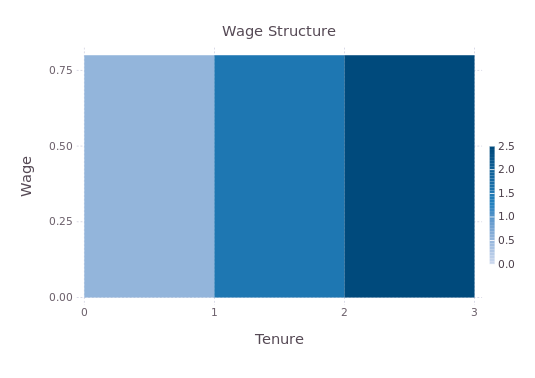

In [54]:
DisplayDP.Wages(W,colour=Colour)

### Production Function:

$F_0$ Production of Starting Worker  
$F_G$ Production of Last Tenure Worker  
$\hat{F}$ Peak Production  
$\hat{G}$ Tenure for Peaked Production

In [55]:
F_0=0.8;
F_G=1.0;
F̂=1.1;
Ĝ=2;

#### Error Checking:

In [56]:
isa(Ĝ,Int) || error("G\u0302 is not an Interger");             # Check if Ĝ is an Interger
1<Ĝ<G || error("G\u0302 \u2209 (0,G)");                        # Check if Ĝ is a Valid Tenure Year
F_0=float(F_0);                                                # Make F_0 a Float
F_G=float(F_G);                                                # Make F_G a Float
F̂=float(F̂);                                                    # Make F̂ a Float
;

#### Create Production Structure

In [57]:
F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);

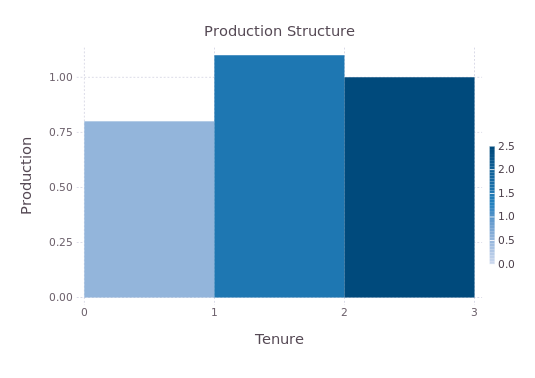

In [58]:
DisplayDP.Production(F,colour=Colour)

### Firing Cost Function

$\phi$ Percentage of Wage Paid as Firing Cost  
$S=\left\{ \begin{array}{l l}
1 & \text{Seniority}\\
0 & \text{No Seniority}
\end{array} \right.$ Increase of Firing Cost per year of tenure

In [59]:
ϕ=0.2;
S=true;

#### Error Checking:

In [60]:
ϕ>0 || error("Firing Cost must be positive");            # Check if ϕ>0
ϕ=float(ϕ);                                              # Make ϕ a Float
isa(S,Bool) || error("Seniority (S) is not Boolean");    # Check S is Boolean
;

#### Create Firing Cost Structure

In [61]:
FC=LabourDP.FiringCost(G,ϕ,S,W);

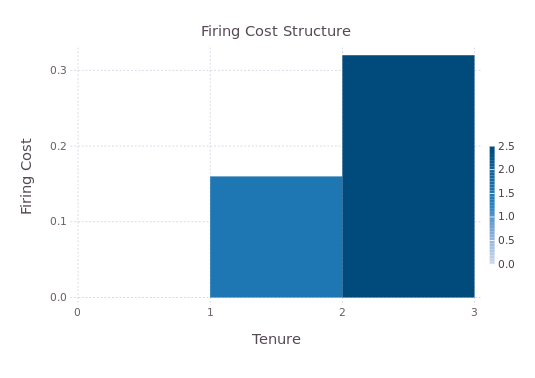

In [62]:
DisplayDP.FiringCost(FC,colour=Colour)

### Quit and Retirement Shock

$\delta$ Probability of a worker Quiting in the last tenure group  
$\gamma$ Probability of a worker Retiring in all but the last tenure group

In [63]:
δ=0.1;
γ=0.5;

Note: The Markov Process for Quit and Retirement is calculated later as it needs the Labour Portfolios.

#### Error Checking:

In [64]:
0<δ<1 || error("\u03B4 \u2209 (0,1)");                   # Check if δ is between 0 and 1
0<γ<1 || error("\u03B3 \u2209 (0,1)");                   # Check if γ is between 0 and 1
;

### Demand Shock

$M_D$ Maximum Demand Shock $\max_D$  
$m_D$ Minimum Demand Shock $\min_D$  
$\rho$   Autocorrelation of Demand Shock  
$N_D$ Number of Demand Shocks  
  
$d$ Standard Deviation from the Mean to the Max/Min

In [65]:
M_D=10.;
m_D=5.;
ρ=0.8;
N_D=6;

d=2.;

#### Error Checking:

In [66]:
-1<ρ<1  || error("\u03C1 \u2209 (-1,1) No Unit Root Allowed");        # Check if ρ has a Unit Root
M_D>m_D || error("Maximum Demand is not larger than Minimum Demand"); # Check of M_D>m_D
N_D>1   || error("Number of Demand Shocks must be larger than 1");    # Check if N_D>1
isa(N_D,Int) || error("Number of Demand Grid is not an Interger");    # Check N_D is Interger
d>0     || error("Standard Deviation of Max is not Positive");        # Check if d>0
M_D=float(M_D);                                                       # Make M_D a Float
m_D=float(m_D);                                                       # Make m_D a Float
ρ=float(ρ);                                                           # Make ρ a Float
d=float(d);                                                           # Make d a Float
;

#### Create Markov Shock

In [67]:
DShock=LabourDP.Demand(M_D,m_D,ρ,N_D,d);

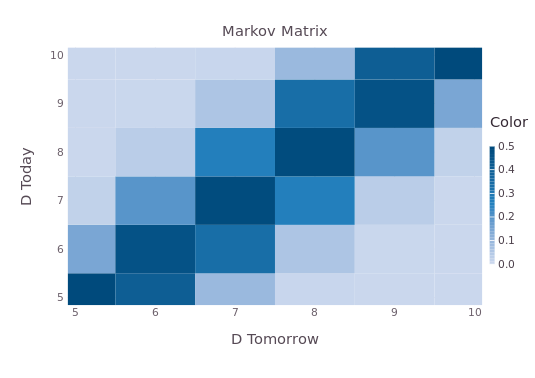

In [68]:
DisplayDP.Demand(DShock[1],DShock[2],colour=Colour)

## Labour Portfolios

### Labour Portfolio Function:

In [69]:
fP=LabourDP.fPort(G);

In [70]:
Text=DisplayDP.FuncText(LabourDP.ePort(G),G);

IpDisp.Math(Text)

PyObject <IPython.core.display.Math object>

### Create Labour Portfolio:

$N_G$ Max Number of Workers in last Tenure Group

In [71]:
N_G=ceil(Int,M_D/F_G);

In [72]:
IpDisp.Math("N_G=ceil(max(D)/F_G)")

PyObject <IPython.core.display.Math object>

In [73]:
L=LabourDP.LabourPortfolio(G,N,N_G,fP);

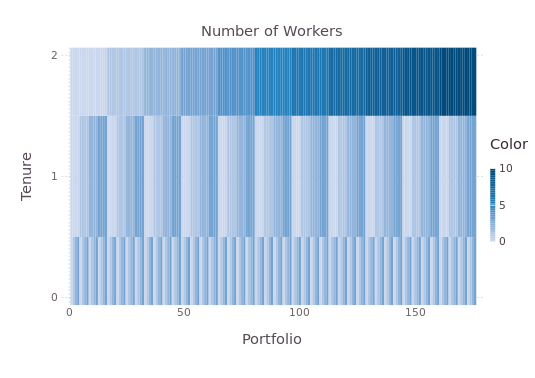

In [74]:
Sl=length(L);
DisplayDP.LabourPortfolio(L,colour=Colour)

### Shave Labour Portfolio:

#### Max Production:

$M_F$ is Maximum production a Labour Portfolio can have to be evaluated

In [75]:
M_F=M_D+maximum(F);

In [76]:
IpDisp.Math("M_F=M_D+max(F)")

PyObject <IPython.core.display.Math object>

#### Shave:

In [77]:
L=LabourDP.Shave(L,F,M_F);

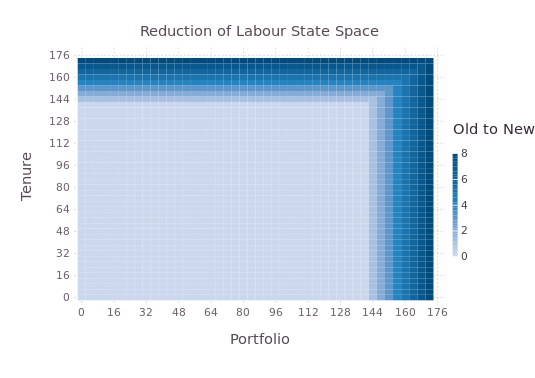

In [78]:
DisplayDP.Shave(Sl,length(L),colour=Colour)

### Find Feasible Portfolio:

#### Feasible Labour Choices:

##### Feasible Function:

In [79]:
Feasf=LabourDP.fFeas(G,N);

In [80]:
Text=DisplayDP.FuncText(LabourDP.eFeas(G,N),G);

IpDisp.Math(Text)

PyObject <IPython.core.display.Math object>

##### Feasible:

Now find the indexes of feasible portfolios

In [81]:
Feas=LabourDP.FeasibleChoices(Feasf,L);

#### Possible Labour Depreciation:

In [82]:
QnRFeas=LabourDP.FeasibleQnR(fP,L);

## Quit and Retirement

### Transition Matrix

In [83]:
QnR=LabourDP.QnRTransition(L,QnRFeas,δ,γ);

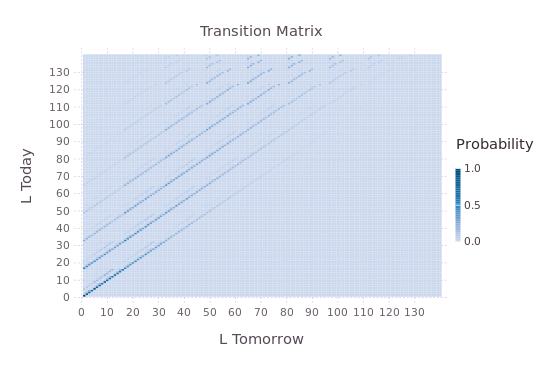

In [84]:
DisplayDP.QnR(QnR,colour=Colour)

## Profits

In [85]:
P=LabourDP.Profits(L,DShock[1],W,F,FC,Feas);

Slider{Int64}([Input{Int64}] 3,"d",3,1:6)

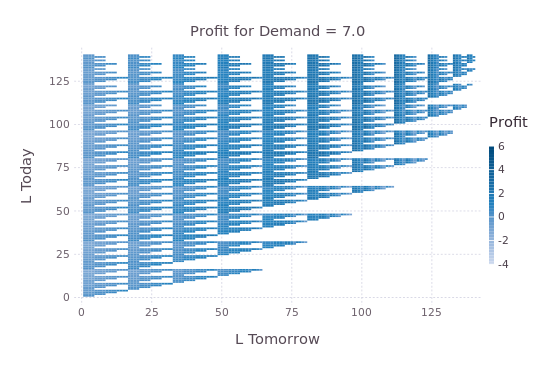

In [86]:
DisplayDP.Profits(P,Feas,DShock[1],colour=Colour)

## Value Function Iteration

In [87]:
Solution=LabourDP.VFI(β,P,DShock[2],QnR,Feas[2]);

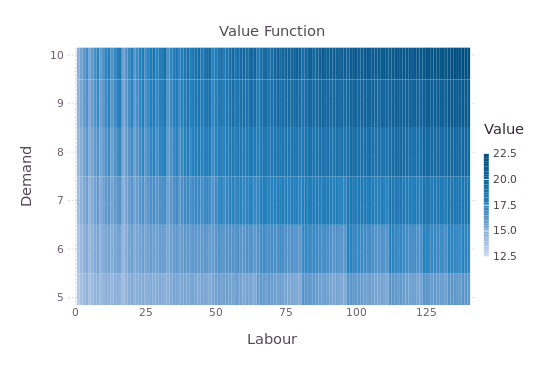

In [88]:
DisplayDP.Value(Solution[1],DShock[1],colour=Colour)